#Here we gonna start with our ML project on Caifornia Housing dataset

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly_express as px

In [2]:
raw_df = pd.read_csv('cal_housing[1].data')

In [3]:
columns = ['Longitude','Latitude','housingMedianAge','totalRooms','totalBedrooms','population','households','medianIncome','medianHouseValue']
raw_df.columns=columns

In [4]:
raw_df.head()

,Longitude,Latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
1,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
2,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
3,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
4,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0


In [5]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20639 entries, 0 to 20638
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Longitude         20639 non-null  float64
 1   Latitude          20639 non-null  float64
 2   housingMedianAge  20639 non-null  float64
 3   totalRooms        20639 non-null  float64
 4   totalBedrooms     20639 non-null  float64
 5   population        20639 non-null  float64
 6   households        20639 non-null  float64
 7   medianIncome      20639 non-null  float64
 8   medianHouseValue  20639 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [6]:
raw_df.describe()

,Longitude,Latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
count,20639.000000,20639.000000,20639.000000,20639.000000,20639.000000,20639.000000,20639.000000,20639.000000,20639.000000
mean,-119.569576,35.631753,28.638888,2635.848152,537.917825,1425.530210,499.557779,3.870455,206843.910122
std,2.003495,2.135947,12.585568,2181.633870,421.248495,1132.463507,382.330173,1.899615,115385.731702
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1448.000000,295.500000,787.000000,280.000000,2.563100,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534700,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.742850,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


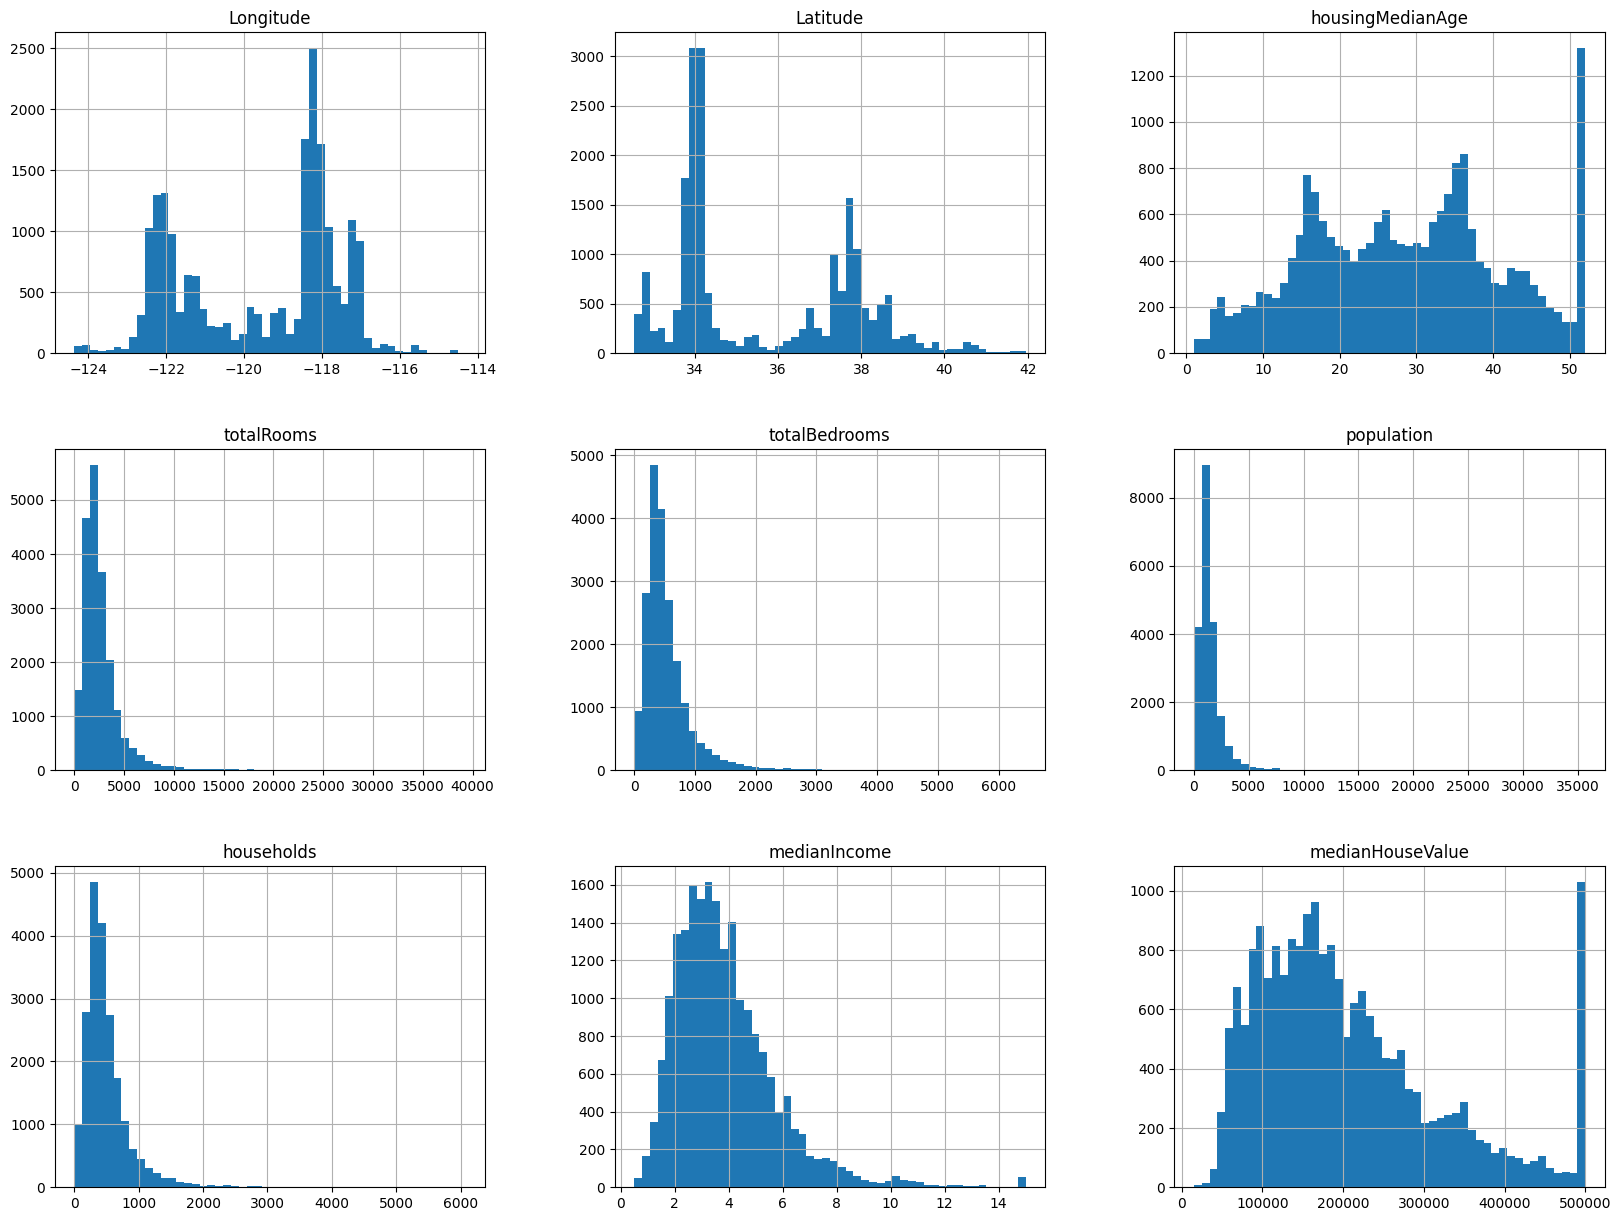

In [7]:
raw_df.hist(bins=50,figsize=(20,15))
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
train_val_df,test_df=train_test_split(raw_df, test_size=0.2,random_state=42)

In [9]:
train_val_df.shape,test_df.shape

((16511, 9), (4128, 9))

In [10]:
train_df,val_df=train_test_split(train_val_df,test_size=0.2,random_state=42)

In [11]:
train_df.shape,val_df.shape,test_df.shape

((13208, 9), (3303, 9), (4128, 9))

In [12]:
input_cols=raw_df.drop(columns=['medianHouseValue']).columns.tolist()
target_col=["medianHouseValue"]

In [13]:
train_input=train_df[input_cols].copy()
val_input=val_df[input_cols].copy()
train_target=train_df[target_col].copy()
val_target=val_df[target_col].copy()

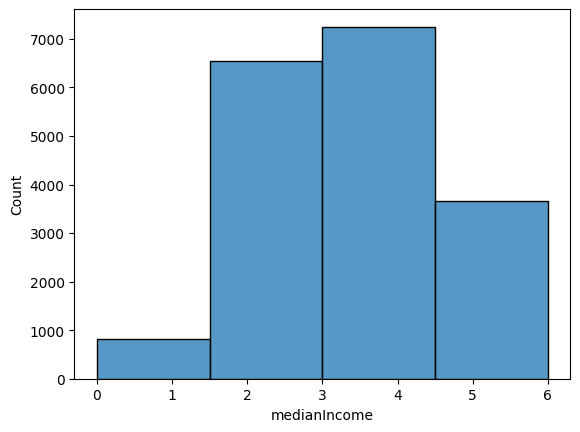

In [14]:
sns.histplot(data=raw_df,x='medianIncome',bins=[0., 1.5, 3.0, 4.5, 6.])
plt.show()

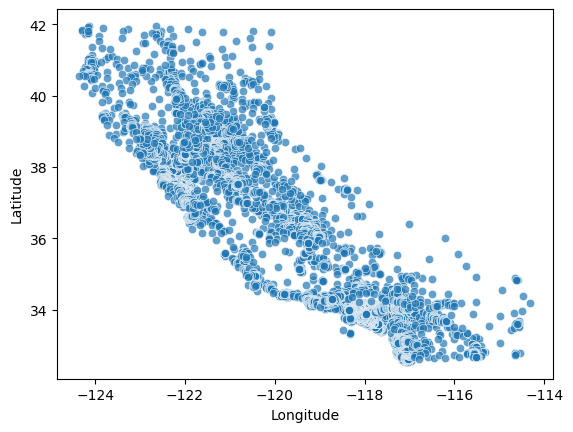

In [15]:
sns.scatterplot(data=raw_df,x='Longitude',
                y='Latitude',
                alpha=0.7)
plt.show()

In [16]:
raw_df

,Longitude,Latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
1,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
2,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
3,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
4,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0
...,...,...,...,...,...,...,...,...,...
20634,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20635,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20636,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20637,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [17]:
fig=figsize=(8,10)
fig=px.scatter(
    raw_df,
    x="Longitude",
    y="Latitude",
    size=raw_df['population']/100,
    color='medianHouseValue',
    color_continuous_scale='jet',
    opacity=0.5
)
fig.show()

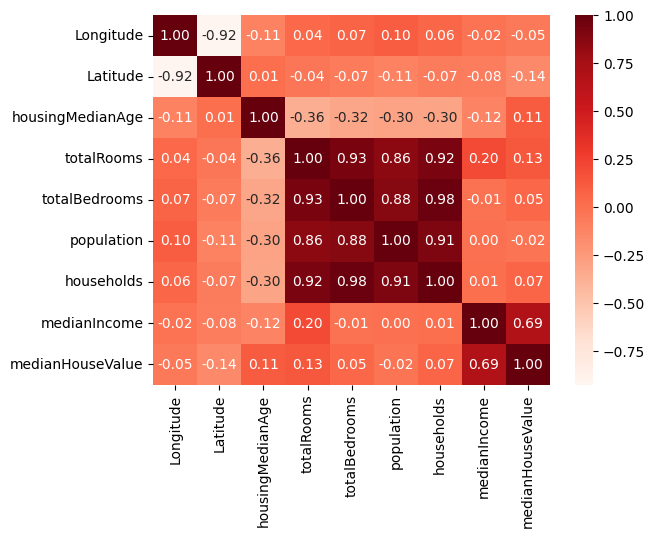

In [18]:
corr_df = raw_df.select_dtypes(np.number)
corr_matrix = corr_df.corr()
sns.heatmap(corr_matrix, cmap='Reds', annot=True, fmt=".2f")
plt.show()

Some basic Feature Engineering 

In [19]:
raw_df['rooms_per_household']=raw_df['totalRooms']/raw_df['households']
raw_df['bedroom_per_room']=raw_df['totalBedrooms']/raw_df['totalRooms']
raw_df['popu_per_household']=raw_df['population']/raw_df['households']

In [20]:
corr_mat2=raw_df.corr()
corr_mat2

,Longitude,Latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue,rooms_per_household,bedroom_per_room,popu_per_household
Longitude,1.000000,-0.924661,-0.108141,0.044519,0.068320,0.099717,0.055251,-0.015028,-0.045837,-0.027501,0.092801,0.002473
Latitude,-0.924661,1.000000,0.011123,-0.036060,-0.066272,-0.108740,-0.070989,-0.079941,-0.144289,0.106361,-0.114250,0.002369
housingMedianAge,-0.108141,0.011123,1.000000,-0.361238,-0.320453,-0.296212,-0.302884,-0.119164,0.105536,-0.153312,0.136429,0.013194
totalRooms,0.044519,-0.036060,-0.361238,1.000000,0.929891,0.857121,0.918482,0.198171,0.134253,0.133826,-0.187415,-0.024583
totalBedrooms,0.068320,-0.066272,-0.320453,0.929891,1.000000,0.878020,0.979828,-0.007984,0.050701,0.000816,0.086060,-0.028333
population,0.099717,-0.108740,-0.296212,0.857121,0.878020,1.000000,0.907218,0.004946,-0.024552,-0.072186,0.037023,0.069862
households,0.055251,-0.070989,-0.302884,0.918482,0.979828,0.907218,1.000000,0.013146,0.065952,-0.080571,0.066971,-0.027312
medianIncome,-0.015028,-0.079941,-0.119164,0.198171,-0.007984,0.004946,0.013146,1.000000,0.688000,0.326871,-0.615451,0.018774
medianHouseValue,-0.045837,-0.144289,0.105536,0.134253,0.050701,-0.024552,0.065952,0.688000,1.000000,0.151902,-0.255542,-0.023735
rooms_per_household,-0.027501,0.106361,-0.153312,0.133826,0.000816,-0.072186,-0.080571,0.326871,0.151902,1.000000,-0.418687,-0.004851


In [21]:
corr_mat2['medianHouseValue'].sort_values(ascending=False)

medianHouseValue       1.000000
medianIncome           0.688000
rooms_per_household    0.151902
totalRooms             0.134253
housingMedianAge       0.105536
households             0.065952
totalBedrooms          0.050701
popu_per_household    -0.023735
population            -0.024552
Longitude             -0.045837
Latitude              -0.144289
bedroom_per_room      -0.255542
Name: medianHouseValue, dtype: float64

Added new features to our train, val, test data

In [22]:
train_input['rooms_per_household']=train_input['totalRooms']/train_input['households']
train_input['popu_per_household']=train_input['population']/train_input['households']
train_input['bedroom_per_room']=train_input['totalBedrooms']/train_input['totalRooms']

val_input['rooms_per_household']=val_input['totalRooms']/val_input['households']
val_input['popu_per_household']=val_input['population']/val_input['households']
val_input['bedroom_per_room']=val_input['totalBedrooms']/val_input['totalRooms']

test_df['rooms_per_household']=test_df['totalRooms']/test_df['households']
test_df['popu_per_household']=test_df['population']/test_df['households']
test_df['bedroom_per_room']=test_df['totalBedrooms']/test_df['totalRooms']

In [23]:
train_input.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13208 entries, 10758 to 9911
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Longitude            13208 non-null  float64
 1   Latitude             13208 non-null  float64
 2   housingMedianAge     13208 non-null  float64
 3   totalRooms           13208 non-null  float64
 4   totalBedrooms        13208 non-null  float64
 5   population           13208 non-null  float64
 6   households           13208 non-null  float64
 7   medianIncome         13208 non-null  float64
 8   rooms_per_household  13208 non-null  float64
 9   popu_per_household   13208 non-null  float64
 10  bedroom_per_room     13208 non-null  float64
dtypes: float64(11)
memory usage: 1.2 MB


Since we already have a Clean dataset no need for imputation

In [24]:
fig = px.scatter_mapbox(raw_df, lat='Latitude', lon='Longitude', zoom=5, mapbox_style="carto-positron")
fig.show()

C:\Users\Abhilove Goyal\AppData\Local\Temp\ipykernel_20672\2300648968.py:1: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



In [25]:
raw_df.to_csv('raw_df',index=False)

Starting with Models

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
lin_reg=LinearRegression()
lin_reg.fit(train_input,train_target)

LinearRegression()

In [28]:
lin_train_pred=lin_reg.predict(train_input)

In [29]:
from sklearn.metrics import mean_squared_error
lin_mse_train=mean_squared_error(lin_train_pred,train_target)
lin_rmse_train=np.sqrt(lin_mse_train)
lin_rmse_train

np.float64(67915.80611104463)

In [30]:
from sklearn.tree import DecisionTreeRegressor
tree_reg=DecisionTreeRegressor()
tree_reg.fit(train_input,train_target)
tree_pred=tree_reg.predict(train_input)

In [31]:
tree_mse=mean_squared_error(tree_pred,train_target)
tree_rmse=np.sqrt(tree_mse)
tree_rmse

np.float64(0.0)

In [32]:
tree_val_pred=tree_reg.predict(val_input)
tree_val_mse=mean_squared_error(tree_val_pred,val_target)
tree_val_rmse=np.sqrt(tree_val_mse)
tree_val_rmse

np.float64(76056.06082355944)

In [33]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(tree_reg,train_input,train_target,
                       scoring="neg_mean_squared_error",cv=10)
tree_rmse_score=np.sqrt(-scores)

In [34]:
def display_scores(scores):
    print("Scores:",scores)
    print("Mean",scores.mean())
    print("Standard Deviation:",scores.std())

In [35]:
display_scores(lin_train_pred),
display_scores(tree_rmse_score)

Scores: [[515443.02105744]
 [199805.04355904]
 [142130.01664787]
 ...
 [193426.97101097]
 [233302.46083119]
 [185788.40577714]]
Mean 206596.60175651082
Standard Deviation: 93239.03201246235
Scores: [75362.34856621 75216.99434335 72176.05834816 76531.70853271
 73069.55859162 74536.28996917 74417.00066063 74476.86931137
 74611.61728975 78899.17521014]
Mean 74929.76208231144
Standard Deviation: 1742.3954855253878


In [36]:
from sklearn.ensemble import RandomForestRegressor

In [37]:
forest_reg=RandomForestRegressor()
forest_reg.fit(train_input,train_target)
forest_train_pred=forest_reg.predict(train_input)
forest_mse=mean_squared_error(train_target,forest_train_pred)
forest_rmse=np.sqrt(forest_mse)

c:\Users\Abhilove Goyal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [38]:
forest_rmse

np.float64(19128.16705554726)

In [39]:
import joblib
joblib.dump(forest_reg,"my_model.pkl")
my_model_loaded=joblib.load("my_model.pkl")

In [40]:
print(my_model_loaded)

RandomForestRegressor()


In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
# from joblib import dump,load

# joblib.dump(forest_reg,'random_forest_model.pkl')
# print("Model saved successfully")

In [43]:
# import joblib 
# loaded_model=joblib.load('random_forest_model.pkl')
# print("Model loaded successfully")

In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
# param_grid=[
#     {'n_estimators':[3,10,30], 'max_features':[2,4,6,8]},
#     {'bootstrap':[False], 'n_estimators':[3.10],'max_features':[2,3,4]}
# ]
# forest_reg2=RandomForestRegressor()
# grid_search=GridSearchCV(forest_reg2,param_grid=param_grid,cv=5,
#                          scoring='neg_mean_squared_error',
#                          return_train_score=True)
# grid_search.fit(train_input,train_target)

In [46]:
# grid_search.best_score_

In [47]:
# grid_search.best_params_

In [48]:
# grid_search.best_estimator_

In [49]:
from sklearn.metrics import mean_squared_error
tuned_model=RandomForestRegressor(n_estimators=30,
    max_features=4
)
tuned_model.fit(train_input,train_target)
tuned_trees_pred=tuned_model.predict(train_input)
mse=mean_squared_error(train_target,tuned_trees_pred)
rmse = np.sqrt(mse)
print(rmse)

c:\Users\Abhilove Goyal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



19917.60336137805


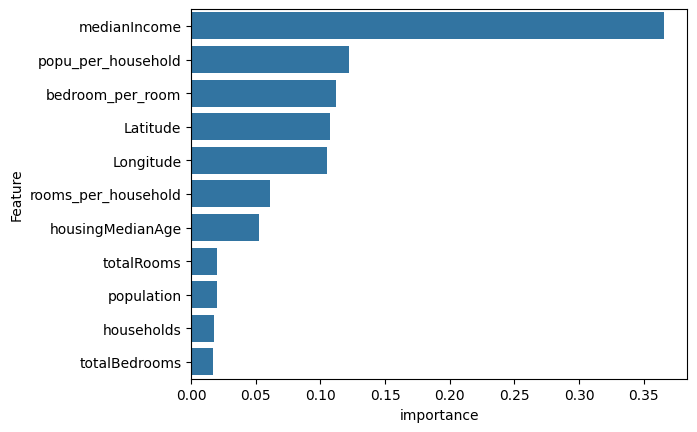

In [50]:
feat_imp=tuned_model.feature_importances_
feature_name=train_input.columns
importance_df=pd.DataFrame({
    'Feature':feature_name,
    'importance':feat_imp
})
importance_df=importance_df.sort_values(by='importance',ascending=False)
fig = sns.barplot(importance_df,x='importance',y='Feature')
plt.show()
# print(importance_df)

In [51]:
# from joblib import dump
# dump(forest_reg2,"tuned_random_forest")
# print("Model saved successfully")

In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(train_input)

array([[ 8.49005928e-01, -9.41174405e-01, -1.54374985e+00, ...,
         5.76811019e-01, -8.22781038e-02, -8.60007694e-01],
       [ 6.34310724e-01, -7.25164997e-01,  5.84330587e-01, ...,
        -1.21360237e+00,  2.77028179e-02,  3.65143491e+00],
       [-7.28754174e-01,  7.91596721e-01,  1.05723735e+00, ...,
        -6.83263039e-02, -3.72192969e-02, -3.41649451e-01],
       ...,
       [ 1.28838216e+00, -1.35910565e+00, -8.34389706e-01, ...,
         4.70083653e-02,  1.39407596e-02, -5.17296531e-01],
       [ 8.49005928e-01, -8.42561414e-01, -9.13207500e-01, ...,
         2.35079408e-01, -1.01244128e-03, -7.17884702e-01],
       [-1.35786105e+00,  1.25648654e+00,  1.29369073e+00, ...,
        -4.91738514e-01, -6.99615265e-02,  5.52171004e-01]])

In [53]:
import joblib
# joblib.dump(scaler,'my_scaler')

In [54]:
model = joblib.load("tuned_random_forest")
model.fit(train_input,train_target)
model_pred=model.predict(train_input)
sco=mean_squared_error(model_pred,train_target)
rmse = np.sqrt(sco)
print(rmse)

c:\Users\Abhilove Goyal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



19173.29699401895


In [55]:
scaler=joblib.load('my_scaler')
scaler.transform(val_input)

array([[ 0.56940287, -0.64533543,  0.11142382, ..., -0.85586256,
         0.19783976,  1.48145672],
       [-1.56756334,  1.29874925, -0.9132075 , ..., -0.68092586,
        -0.10327059,  1.05586303],
       [-1.18810205,  0.44879918, -0.51911853, ...,  1.08852745,
        -0.04849147, -1.09574883],
       ...,
       [ 0.71919022, -0.74394842,  0.50551279, ..., -0.00407061,
         0.00671097, -0.38187523],
       [ 0.98880746, -0.75334014, -0.99202529, ...,  0.27750025,
         0.05961308, -0.85448108],
       [ 0.5793887 , -0.8002987 , -0.51911853, ..., -0.41988563,
        -0.07891696,  0.47407821]])

In [56]:
model=RandomForestRegressor(n_estimators=50,max_features=6,max_depth=50)
model.fit(train_input,train_target)

c:\Users\Abhilove Goyal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestRegressor(max_depth=50, max_features=6, n_estimators=50)

In [57]:
val_pred=model.predict(val_input)
val_mse = mean_squared_error(val_pred,val_target)
val_rmse = np.sqrt(val_mse)
print(val_rmse)

53635.23027649927


In [ ]:
# pip install xgboost


   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.5/124.9 MB 215.0 kB/s eta 0:09:39
   ---------------------------------------- 0.5/124.9 MB 215.0 kB/s eta 0:09:39
   ---------------------------------------- 0.5/124.9 MB 215.0 kB/s eta 0:09:39
   ---------------------------------------- 0.5/124.9 MB 215.0 kB/s eta 0:09:39
   -------------------------------------

In [60]:
from xgboost import XGBRegressor 

In [ ]:
model=XGBRegressor(n_estimators=100,
                   n_jobs=-1,
                   subsample=0.8,
                   random_state=42,
                  #  reg_alpha=0.1,     
                   reg_lambda=0.1, 
                   max_depth=7)

In [142]:
model.fit(train_input,train_target)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [143]:
train_pred=model.predict(val_input)
train_pred

array([141491.08, 188135.14, 416755.22, ..., 216422.5 , 155536.34,
       338218.1 ], dtype=float32)

In [144]:
mse = mean_squared_error(train_pred,val_target)
def rmse(mse):
    return np.sqrt(mse)
rmse(mse)

np.float64(50981.02906230812)

In [145]:
param_grid={
    'n_estimators':[50,100,200],
    "max_depth":[5,7,10],
    "learning_rate":[0.01,0.02,0.1,0.2],
    'subsample':[0.7,0.8,0.9,1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3]
}

In [146]:
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=20,  # Number of combinations to try
    scoring='neg_mean_absolute_error',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)
random_search.fit(train_input, train_target)

# Get best parameters
best_params = random_search.best_params_
print("Best Parameters:", best_params)

# Train best model
best_model = XGBRegressor(**best_params, n_jobs=-1)
best_model.fit(train_input,train_target)

# Predict & evaluate
y_pred = best_model.predict(train_input)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'subsample': 1.0, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.2, 'gamma': 0.2, 'colsample_bytree': 1.0}


In [ ]:
new_model = XGBRegressor(reg_alpha=0.1, reg_lambda=1.5, n_jobs=-1,subsample= 1.0, n_estimators= 200, max_depth= 5, learning_rate= 0.2, gamma= 0.2, colsample_bytree= 1.0)
new_model.fit(train_input,train_target)
new_mse=new_model.predict(val_input)
mse2=mean_squared_error(new_mse,val_target)
rmse2= np.sqrt(mse2)
rmse2

np.float64(48231.305558558925)

In [ ]:
# joblib.dump(new_model,'xgboost_model')
# print("done")

done


Ensembling Models -> Bad Idea

In [ ]:
# from sklearn.ensemble import StackingRegressor
# from sklearn.linear_model import Ridge
# # forest_model = joblib.load('random_forest_model.pkl')
# base_models=[
#     ('xgb',XGBRegressor(reg_alpha=1, reg_lambda=1, n_jobs=-1,subsample= 1.0, n_estimators= 200, max_depth= 5, learning_rate= 0.2, gamma= 0.2, colsample_bytree= 1.0)),
#     ('rf',RandomForestRegressor(n_estimators=200, max_depth=7, min_samples_leaf=5, random_state=42)),
#     ('ridge',Ridge(alpha=1.0))
# ]
# meta_model = XGBRegressor(n_estimators=30,learning_rate=0.1,n_jobs=-1)
# stack=StackingRegressor(
#     estimators=base_models,
#     final_estimator=meta_model,n_jobs=-1
# )

In [ ]:
# stack.fit(train_input,train_target)
# pred=stack.predict(val_input)
# mse = mean_squared_error(pred,val_target)
# rmse = np.sqrt(mse)
# rmse

c:\Users\Abhilove Goyal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_stacking.py:970: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



np.float64(48690.772167850686)